# Week 5

In [15]:
a1=[-1,1,-1,1];
a2=[-1,3,-1,3]; # [-2,2,-2,2] -> would yield quitting in second iteration
a3=[1,3,5,7];

In [5]:
using LinearAlgebra

## iteration $i=1$

In [13]:
qt1=a1;
if qt1 == zeros(4)
    println("quitting")
else
    q1 = qt1/norm(qt1);
end
norm(q1)

1.0

## iteration $i=2$

In [16]:
qt2 = a2 - (q1'*a2)*q1;
if qt2 == zeros(4)
    println("quitting")
else
    q2 = qt2/norm(qt2);
end
norm(q2)

1.0

## iteration $i=3$

In [17]:
qt3 = a3 - (q1'*a3)*q1 - (q2'*a3)*q2 ;
if qt3 == zeros(4) #tempted to write norm(qt3) < 10^-9
    println("quitting")
else
    q3 = qt3/norm(qt3);
end
norm(q3)

1.0

In [22]:
outputVecs =[q1,q2,q3]

3-element Array{Array{Float64,1},1}:
 [-0.5, 0.5, -0.5, 0.5]
 [0.5, 0.5, 0.5, 0.5]  
 [-0.5, -0.5, 0.5, 0.5]

In [19]:
q1'*q3

0.0

In [20]:
q1'*q2

0.0

In [21]:
q2'*q3

0.0

In [23]:
norm.(outputVecs)

3-element Array{Float64,1}:
 1.0
 1.0
 1.0

In [24]:
? qr

search: qr qr! QR QRPivoted sqrt isqrt QuickSort PartialQuickSort



```
qr(A, pivot=Val(false)) -> F
```

Compute the QR factorization of the matrix `A`: an orthogonal (or unitary if `A` is complex-valued) matrix `Q`, and an upper triangular matrix `R` such that

$$
A = Q R
$$

The returned object `F` stores the factorization in a packed format:

  * if `pivot == Val(true)` then `F` is a [`QRPivoted`](@ref) object,
  * otherwise if the element type of `A` is a BLAS type ([`Float32`](@ref), [`Float64`](@ref), `ComplexF32` or `ComplexF64`), then `F` is a [`QRCompactWY`](@ref) object,
  * otherwise `F` is a [`QR`](@ref) object.

The individual components of the decomposition `F` can be retrieved via property accessors:

  * `F.Q`: the orthogonal/unitary matrix `Q`
  * `F.R`: the upper triangular matrix `R`
  * `F.p`: the permutation vector of the pivot ([`QRPivoted`](@ref) only)
  * `F.P`: the permutation matrix of the pivot ([`QRPivoted`](@ref) only)

Iterating the decomposition produces the components `Q`, `R`, and if extant `p`.

The following functions are available for the `QR` objects: [`inv`](@ref), [`size`](@ref), and [`\`](@ref). When `A` is rectangular, `\` will return a least squares solution and if the solution is not unique, the one with smallest norm is returned. When `A` is not full rank, factorization with (column) pivoting is required to obtain a minimum norm solution.

Multiplication with respect to either full/square or non-full/square `Q` is allowed, i.e. both `F.Q*F.R` and `F.Q*A` are supported. A `Q` matrix can be converted into a regular matrix with [`Matrix`](@ref).  This operation returns the "thin" Q factor, i.e., if `A` is `m`×`n` with `m>=n`, then `Matrix(F.Q)` yields an `m`×`n` matrix with orthonormal columns.  To retrieve the "full" Q factor, an `m`×`m` orthogonal matrix, use `F.Q*Matrix(I,m,m)`.  If `m<=n`, then `Matrix(F.Q)` yields an `m`×`m` orthogonal matrix.

# Examples

```jldoctest
julia> A = [3.0 -6.0; 4.0 -8.0; 0.0 1.0]
3×2 Array{Float64,2}:
 3.0  -6.0
 4.0  -8.0
 0.0   1.0

julia> F = qr(A)
LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
3×3 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.6   0.0   0.8
 -0.8   0.0  -0.6
  0.0  -1.0   0.0
R factor:
2×2 Array{Float64,2}:
 -5.0  10.0
  0.0  -1.0

julia> F.Q * F.R == A
true
```

!!! note
    `qr` returns multiple types because LAPACK uses several representations that minimize the memory storage requirements of products of Householder elementary reflectors, so that the `Q` and `R` matrices can be stored compactly rather as two separate dense matrices.


---

```
qr(A) -> QRSparse
```

Compute the `QR` factorization of a sparse matrix `A`. Fill-reducing row and column permutations are used such that `F.R = F.Q'*A[F.prow,F.pcol]`. The main application of this type is to solve least squares or underdetermined problems with [`\`](@ref). The function calls the C library SPQR.

# Examples

```jldoctest
julia> A = sparse([1,2,3,4], [1,1,2,2], [1.0,1.0,1.0,1.0])
4×2 SparseMatrixCSC{Float64,Int64} with 4 stored entries:
  [1, 1]  =  1.0
  [2, 1]  =  1.0
  [3, 2]  =  1.0
  [4, 2]  =  1.0

julia> qr(A)
Base.SparseArrays.SPQR.QRSparse{Float64,Int64}
Q factor:
4×4 Base.SparseArrays.SPQR.QRSparseQ{Float64,Int64}:
 -0.707107   0.0        0.0       -0.707107
  0.0       -0.707107  -0.707107   0.0
  0.0       -0.707107   0.707107   0.0
 -0.707107   0.0        0.0        0.707107
R factor:
2×2 SparseMatrixCSC{Float64,Int64} with 2 stored entries:
  [1, 1]  =  -1.41421
  [2, 2]  =  -1.41421
Row permutation:
4-element Array{Int64,1}:
 1
 3
 4
 2
Column permutation:
2-element Array{Int64,1}:
 1
 2
```


In [25]:
A = rand(100,100);
A[20:30,57:59]

11×3 Array{Float64,2}:
 0.00800283  0.515493    0.704693 
 0.979179    0.670974    0.656131 
 0.439274    0.923024    0.909621 
 0.662374    0.351206    0.117884 
 0.574122    0.687957    0.637417 
 0.952484    0.777679    0.451652 
 0.883576    0.347535    0.363736 
 0.531774    0.00666912  0.0795057
 0.144952    0.588495    0.125178 
 0.124838    0.265854    0.691758 
 0.282884    0.112721    0.368291 

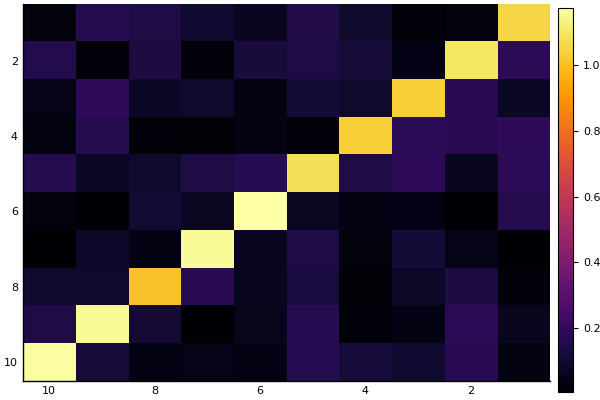

In [58]:
using Plots
pyplot()
heatmap(0.2*rand(10,10) +I,flip=true)

In [38]:
(A+A)+(I+A)

100×100 Array{Float64,2}:
 1.4451    0.450245   1.04462    2.35864   …  1.82197    0.531689   0.774033 
 0.075748  3.47707    0.655738   2.39293      2.5825     1.34163    0.0951183
 2.68111   2.66512    1.6107     2.1033       0.418553   2.72548    1.43921  
 1.52792   0.207849   2.5715     2.61369      1.70904    2.93514    0.306541 
 1.06758   1.34929    1.17592    0.613227     2.93976    0.425936   1.08029  
 2.87142   1.41549    1.05218    1.91097   …  0.161132   0.2399     1.25634  
 1.2825    2.09777    1.22595    1.39392      1.18245    1.3394     2.47982  
 2.77639   2.99343    1.90564    2.72076      1.03428    1.7002     2.13402  
 0.921018  2.42009    0.343931   0.736996     0.0818679  1.16698    1.70898  
 1.88166   2.44284    0.722186   2.36846      1.22919    1.81069    2.20635  
 1.14673   2.05183    2.06666    0.346422  …  2.11489    1.55503    2.0055   
 1.2658    1.13002    1.54586    1.46075      0.603891   0.648169   2.12329  
 2.30082   2.96504    0.022763   2.840

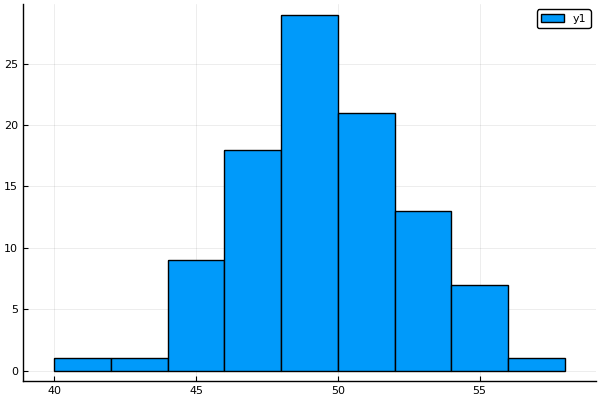

In [41]:
histogram(A*ones(100))

In [48]:
maximum(A)
A[2,3] = 150;

In [49]:
x = rand(100);
x[3] =242;
A*x

100-element Array{Float64,1}:
   108.07231307659697 
 36324.79234206062    
    73.58825231268395 
   227.8858571762353  
   118.88951379973757 
   107.5289190055551  
   124.04968285989185 
   178.4760257072387  
    50.770633222524815
    83.20443093062607 
   189.6747583910869  
   149.20355481314746 
    24.590390028574745
     ⋮                
    32.28306408723849 
   192.1132904405009  
   232.81205099133066 
    86.67924005947502 
   238.16770293657478 
   232.17031073145455 
   167.79164721504603 
   208.3703045021664  
   111.20445382146872 
    62.87832640737124 
   102.66146453707483 
   242.50779979635115 

In [59]:
data = [1,2,3,4,5];
accumulate(+,data)

5-element Array{Int64,1}:
  1
  3
  6
 10
 15

In [62]:
A = [i>=j ? 1 : 0 for i in 1:5, j in 1:5]

5×5 Array{Int64,2}:
 1  0  0  0  0
 1  1  0  0  0
 1  1  1  0  0
 1  1  1  1  0
 1  1  1  1  1

In [63]:
A*data

5-element Array{Int64,1}:
  1
  3
  6
 10
 15

In [64]:
accumulate(*,data)

5-element Array{Int64,1}:
   1
   2
   6
  24
 120

In [65]:
factorial(5)

120

In [68]:
using Statistics

In [70]:
dataC = data .- mean(data)

5-element Array{Float64,1}:
 -2.0
 -1.0
  0.0
  1.0
  2.0

In [71]:
mean(dataC)

0.0

In [72]:
dmA = I - (1/5)*ones(5,5)

5×5 Array{Float64,2}:
  0.8  -0.2  -0.2  -0.2  -0.2
 -0.2   0.8  -0.2  -0.2  -0.2
 -0.2  -0.2   0.8  -0.2  -0.2
 -0.2  -0.2  -0.2   0.8  -0.2
 -0.2  -0.2  -0.2  -0.2   0.8

In [73]:
dmA*data

5-element Array{Float64,1}:
 -2.0
 -1.0
  0.0
  1.0
  2.0

In [74]:
sort(data)

5-element Array{Int64,1}:
 1
 2
 3
 4
 5